# **Using multivariate polynomial regression to predict joint movement of robotic arm to improve the accuracy of movement simulations.**

## Problem statement

Write about what we are doing here, why and how...

## imports

In [80]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

## Datasets

In [81]:
# loading simulation data

sim_df_1 = pd.read_csv('/home/salvador_cb/ai_for_robotic_fabrication/data/digital_output_marcos.csv')
sim_df_2 = pd.read_csv('/home/salvador_cb/ai_for_robotic_fabrication/data/digital_output_Yashashvy.csv')
sim_df_3 = pd.read_csv('/home/salvador_cb/ai_for_robotic_fabrication/data/digital_output_misra.csv')

# loading data from real robotic movement

real_df_1 = pd.read_csv('/home/salvador_cb/ai_for_robotic_fabrication/data/Recording-1-marcos.csv')
real_df_2 = pd.read_csv('/home/salvador_cb/ai_for_robotic_fabrication/data/Recording-1-Yashashvy.csv')

In [82]:
train_df = pd.concat([sim_df_1, sim_df_2], ignore_index=True)

## Defining features and target

In [92]:
X = sim_df_1[['J1', 'J2', 'J3', 'J4', 'J5']].values
y = sim_df_1['J6'].values

## Instansing the model

In [93]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

In [95]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [96]:
new_data = real_df_1[['J1', 'J2', 'J3', 'J4', 'J5']].values
new_data_scaled = scaler.transform(new_data)
new_data_poly = poly.transform(new_data_scaled)

In [97]:
predicted_j6 = model.predict(new_data_poly)
actual_j6 = real_df_1['J6'].values

# new df with predicted and actual values
df = pd.DataFrame({'actual': actual_j6, 'predicted': predicted_j6})

In [98]:
df

,actual,predicted
0,0.290,-4.018646
1,0.289,-4.021324
2,0.289,-4.022455
3,0.289,-4.025219
4,0.289,-4.024715
...,...,...
23985,-2.412,-22.598718
23986,-2.411,-22.585212
23987,-2.409,-22.576554
23988,-2.407,-22.565082


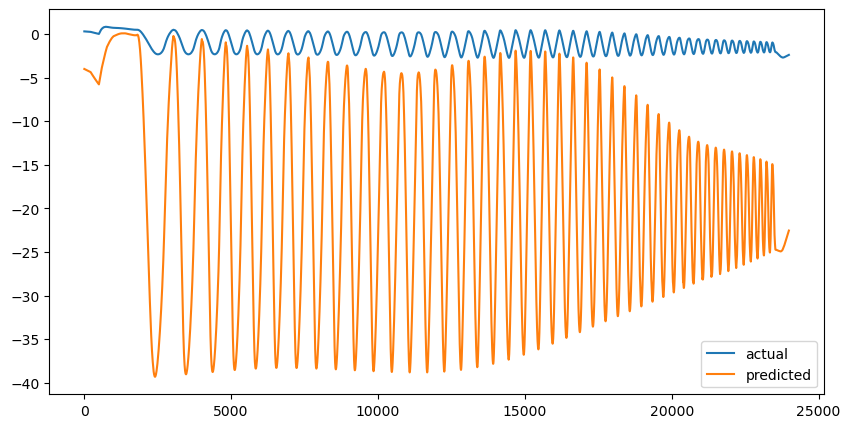

In [99]:
plt.figure(figsize=(10, 5))
plt.plot(df['actual'], label='actual')
plt.plot(df['predicted'], label='predicted')
plt.legend()
